# Notebook for simulating, saving and analysing MOMA-like data for a parameter range

In [2]:
from cells_simulation import *


## Simulation with parameter range

In [91]:
# ========== Simulation parameters ========== #
save_dataset = True    # saves data set as csv
run_ggp = True         # runs the ggp code (located in "../bin/" relative to this nb)

dt = 1e-3
dt_measument = 3 # in minutes
n_cells = 250 # number of cells that will be simulated

div_mode = "adder"

division_log_length = 1+np.log(2)   # for sizer: division, when log_length hits division_log_length
division_time = 60 - 1e-10          # for timer: division, when cell cycle time hits division_time
division_addition = np.log(2)       # for adder: divsion, when division_addition in log_length was added in cell cycle

# out_dir = mk_mising_dir('../data/n{:d}_var_g_{:s}'.format(n_cells, div_mode))

# ========== Model parameters ========== #
parameter_set = {   "mean_lambda": 0.01, 
                    "gamma_lambda": 0.01,
                    "var_lambda": 1e-7,
                    "mean_q": 10,
                    "gamma_q": 1e-2,
                    "var_q": 0.1,
                    "beta": 1e-3,
                    "var_x": 1e-3, # 1e-3,
                    "var_g": 5000, # 5000,
                    "var_dx": 0.001,
                    "var_dg": 500}

# --------- SIMULATE --------- #
cells_simulated = simulate_cells(dt, n_cells, parameter_set, div_mode,
                        division_log_length, 
                        division_time, 
                        division_addition)

dataset = build_data_set(cells_simulated, parameter_set['var_x'], parameter_set['var_g'], int(dt_measument/dt))


| ==================== | Progress 100%  No of cells:  250
Every 3000 th datapoint is saved


In [4]:
out_dir = mk_mising_dir('../data/test_new_init')

# ----------- SAVE ----------- #
if save_dataset:
    directory, filename = get_next_file_name(out_dir)

    write_param_file(os.path.join(directory, "parameters.txt"), parameter_set, {"var_dg" : ["free"]}) 

    write_csv_config(os.path.join(directory, "csv_config.txt"))
    dataset.to_csv(filename)
    print("New simulation saved in", filename)

    # ----------- RUN ----------- #
    if run_ggp:
        run_cmd = suggest_run_command(directory, filename, modes="-m -p")
        print("run: -> \n", run_cmd)
        s = subprocess.run(run_cmd, capture_output=False, shell=True)
        print(s)
    

New simulation saved in ../data/weak_noise/weak_noise_2/weak_noise_2.csv
run: -> 
 ../bin/gfp_gaussian -c ../data/weak_noise/weak_noise_2/csv_config.txt -b ../data/weak_noise/weak_noise_2/parameters.txt -r 1e-3  -i ../data/weak_noise/weak_noise_2/weak_noise_2.csv -l 0 -m -p
CompletedProcess(args='../bin/gfp_gaussian -c ../data/weak_noise/weak_noise_2/csv_config.txt -b ../data/weak_noise/weak_noise_2/parameters.txt -r 1e-3  -i ../data/weak_noise/weak_noise_2/weak_noise_2.csv -l 0 -m -p', returncode=0)


In [5]:

# =============== PLOT =============== #
def plot_cells(cells, n_steps=1):
    _, axes = plt.subplots(2, figsize=(5,4))
    ax = axes.ravel()

    for j in range(len(cells[::n_steps])):
        cell = copy.deepcopy(cells[j])
        cell.time = np.array(cell.time)

        if n_steps>1:
            ax[0].set_title("log length (showing every {:d}th cell)".format(n_steps))
            ax[1].set_title("gfp (showing every {:d}th cell)".format(n_steps))

        else:
            ax[0].set_title("log length")
            ax[1].set_title("gfp")

        # ax[0].set_ylim([1.2, 2.2])
        
        if len(cells[::n_steps]) <20:
            ax[0].axvline(cell.time[-1], ls='--', color='tab:blue')
            ax[1].axvline(cell.time[-1], ls='--', color='tab:orange')

        if j ==0:
            ax[0].plot(cell.time, np.array(cell.log_length), label='log length', color='tab:blue')
            ax[1].plot(cell.time, np.array(cell.gfp), color='tab:orange', label='gfp')

        else:
            ax[0].plot(cell.time, np.array(cell.log_length), color='tab:blue')
            ax[1].plot(cell.time, np.array(cell.gfp), color='tab:orange')

    for j in range(2):
        ax[j].legend()
    plt.tight_layout()
    plt.show()


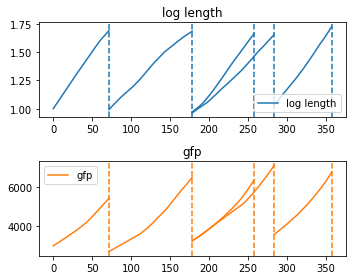

In [6]:
plot_cells(cells_simulated[:5], n_steps=1)

In [7]:
cell_sparse = df2cells(dataset)

In [8]:

# =============== PLOT =============== #
def plot_cells_scatter(cells, n_steps=1):
    _, axes = plt.subplots(2, figsize=(5,4))
    ax = axes.ravel()

    for j in range(len(cells[::n_steps])):
        cell = copy.deepcopy(cells[j])
        cell.time = np.array(cell.time)

        if n_steps>1:
            ax[0].set_title("log length (showing every {:d}th cell)".format(n_steps))
            ax[1].set_title("gfp (showing every {:d}th cell)".format(n_steps))

        else:
            ax[0].set_title("log length")
            ax[1].set_title("gfp")

        # ax[0].set_ylim([1.2, 2.2])
        s=2
        if j ==0:
            ax[0].scatter(cell.time, np.array(cell.log_length), label='log length', color='tab:blue',s=s)
            ax[1].scatter(cell.time, np.array(cell.gfp), color='tab:orange', label='gfp',s=s)

        else:
            ax[0].scatter(cell.time, np.array(cell.log_length), color='tab:blue', s=s)
            ax[1].scatter(cell.time, np.array(cell.gfp), color='tab:orange', s=s)

    for j in range(2):
        ax[j].legend()
    plt.tight_layout()

    plt.show()

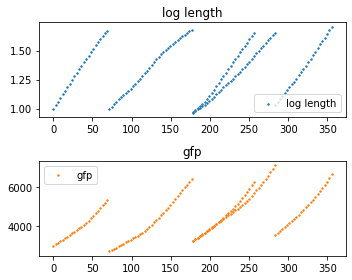

In [14]:
plot_cells_scatter(cell_sparse[:5], n_steps=1)


In [15]:
cells_noise = df2cells(dataset, time="time_min", 
            log_length="log_length_noise", gfp="gfp_noise", 
            cell_id="cell_id", parent_id="parent_id", 
            lt="lt", qt="qt")

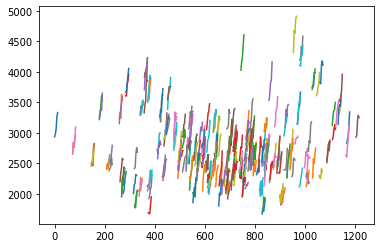

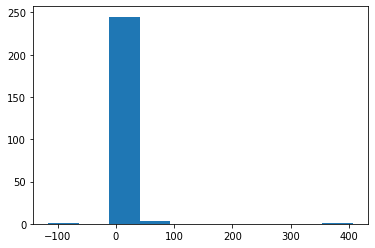

(749.194249502295,
 11.337048873140747,
 6.049703674585066e-06,
 0.010552537872620652)

In [97]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def exponential(x, a):
    return a * (np.exp(l * x) - 1)

def lin(x, a, b):
    return np.array(a) * x + b

def init_l(cell, t=-1):
    l = (cell.log_length[t] - cell.log_length[0])/(cell.time[t] - cell.time[0])
    return l


def init_q(cell, t=-1):

    time = np.array(cell.time[:t])
    g = np.array(cell.gfp[:t])

    dg = (cell.gfp[t] - cell.gfp[0]) 
    dv = (np.exp(cell.log_length[t]) - np.exp(cell.log_length[0]))
    q = dg*0.01/dv
    # print(dg, dv,  q)
    plt.plot(time,g)
    return q


q = []
l = []
for i in range(len(cells_noise)):
    q.append(init_q(cells_noise[i], t=5))
    l.append(init_l(cells_noise[i], t=-1))
plt.show()


plt.hist(q)
plt.show()

np.var(q), np.mean(q), np.var(l), np.mean(l), 


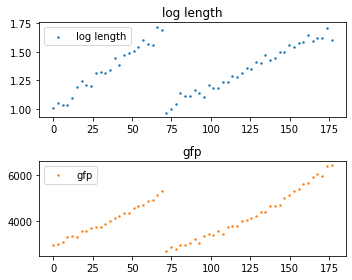

In [98]:
plot_cells_scatter(cells_noise[:2], n_steps=1)


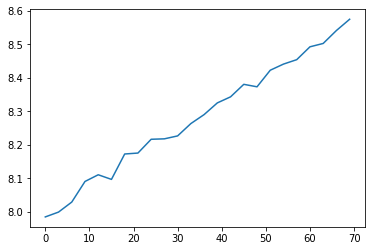

In [46]:
plt.plot(cells_noise[0].time, np.log(cells_noise[0].gfp))